<a href="https://colab.research.google.com/github/Pankaj-Tarone/HomeWork/blob/master/Cifir_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model, model_from_json
from keras.layers import Input, Dense, UpSampling2D, Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD,rmsprop,adadelta
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np
from keras.utils import np_utils


Using TensorFlow backend.


**Define the Batch Size ,Epochs, number of Classes and Download Data**

In [0]:
BATCH_NORM = False

batch_size = 32
num_classes = 10
epochs = 150
data_augmentation = True

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255


170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Model**

In [0]:
#second turn 

def base_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], name='block1_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
    

    model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))
   
    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Flatten())

    model.add(Dense(4096, name='fc2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Dense(num_classes))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.001, decay=0, nesterov=True)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_model = base_model()
cnn_model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       73856    

**Model Training**

In [0]:
cnn = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/150





50000/50000 [==============================] - 29s 573us/step - loss: 2.3006 - acc: 0.1125 - val_loss: 2.3003 - val_acc: 0.1363
Epoch 2/150
50000/50000 [==============================] - 20s 409us/step - loss: 2.2900 - acc: 0.1260 - val_loss: 2.2914 - val_acc: 0.1944
Epoch 3/150
50000/50000 [==============================] - 20s 408us/step - loss: 2.1896 - acc: 0.1786 - val_loss: 2.1617 - val_acc: 0.2572
Epoch 4/150
50000/50000 [==============================] - 20s 406us/step - loss: 2.0026 - acc: 0.2601 - val_loss: 2.0993 - val_acc: 0.2715
Epoch 5/150
50000/50000 [==============================] - 20s 406us/step - loss: 1.9462 - acc: 0.2874 - val_loss: 2.0734 - val_acc: 0.3156
Epoch 6/150
50000/50000 [==============================] - 20s 405us/step - loss: 1.8784 - acc: 0.3208 - val_loss: 2.0316 - val_acc: 0.3380
Epoch 7/

**Model Analysis**

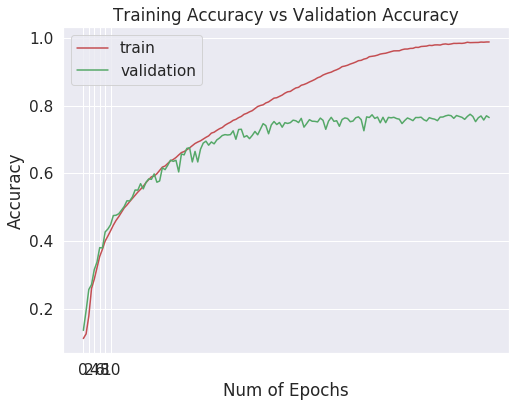

In [0]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


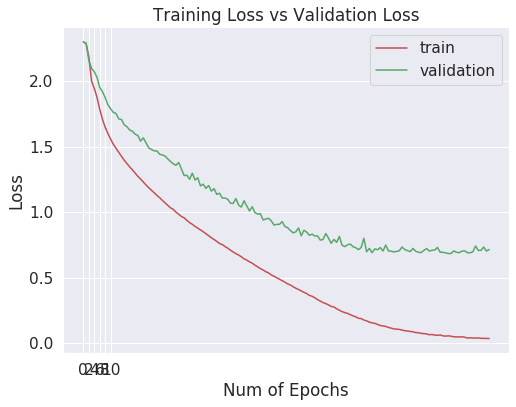

Accuracy: 76.47%
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[868  10  30  10  15   5   5   6  35  16]
 [ 15 890   5   8   1   5   3   4  16  53]
 [ 82   3 637  71  62  64  33  33   7   8]
 [ 32  10  42 600  52 172  26  46   9  11]
 [ 18   6  58  72 714  43  12  69   5   3]
 [ 18   5  16 163  34 710   7  37   2   8]
 [ 14   9  35 103  32  38 747   7   9   6]
 [ 17   2  12  39  50  44   0 820   3  13]
 [ 73  36   7  15   4   5   3   2 839  16]
 [ 37  78   6  11   4   4   1  16  21 822]]


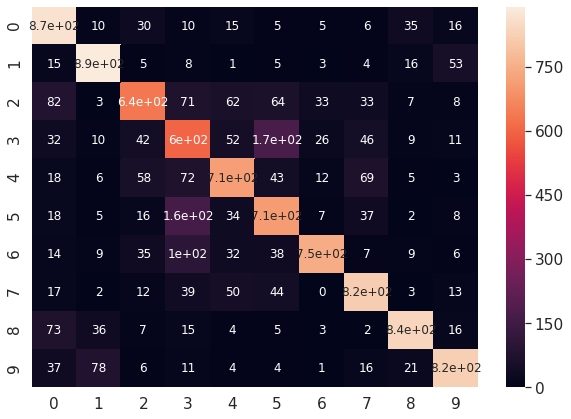

In [0]:
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = cnn_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()